# **Employee Data Application**

This kernel was created in 2021.

In [1]:
library(tidyverse)
library(ggpubr)
library(rstatix)
library(car)
library(broom)
library(dplyr)
library(tidyr)
library(funModeling)
library(cluster)
library(cvms)
library(ggplot2)
library(tibble) # tibble()
library("DescTools")
library(ResourceSelection)
library(modelr)    
library(corrplot)
library(biotools)
library(klaR)
library(MASS) 
library(psych)
library(scatterplot3d)
library(factoextra)
library(matlib)
library(GGally)
library("Hmisc")
library(heplots)
library(gplots)
library(viridis)
library(gridExtra)
library(rpart)
library(tree)
library(rpart.plot)
library(randomForest)
library(corrplot)
library(ggthemes)
library(stringr)
library(scales)
library(fBasics) 
library(kableExtra)
library(plotly)
library(rstatix)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, un

---
biotools version 4.1





Attaching package: ‘psych’


The following objects are masked from ‘package:DescTools’:

    AUC, ICC, SD


The following object is masked from ‘package:Hmisc’:

    describe


The following object is masked from ‘package:car’:

    logit


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”
Warning message:
“'rgl.init' failed, running with 'rgl.useNULL = TRUE'.”

Attaching package: ‘matlib’


The following object is masked from ‘package:psych’:

    tr


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘GGally’


The following object is masked from ‘package:funModeling’:

    range01



Attaching package: ‘heplots’


The following object is masked from ‘package:matlib’:

    gsorth


The following object is masked from ‘package:biotools’:


In [2]:
test <- read.csv('../input/employee-attrition/employee_attrition_test.csv')
data <- read.csv('../input/employee-attrition/employee_attrition_train.csv')

In [3]:
str(data)

'data.frame':	1029 obs. of  35 variables:
 $ Age                     : int  50 36 21 50 52 33 47 22 NA 33 ...
 $ Attrition               : chr  "No" "No" "Yes" "No" ...
 $ BusinessTravel          : chr  "Travel_Rarely" "Travel_Rarely" "Travel_Rarely" "Travel_Frequently" ...
 $ DailyRate               : int  1126 216 337 1246 994 1277 1001 1230 890 530 ...
 $ Department              : chr  "Research & Development" "Research & Development" "Sales" "Human Resources" ...
 $ DistanceFromHome        : int  1 6 7 NA 7 15 4 1 2 16 ...
 $ Education               : int  2 2 1 3 4 1 3 2 4 3 ...
 $ EducationField          : chr  "Medical" "Medical" "Marketing" "Medical" ...
 $ EmployeeCount           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ EmployeeNumber          : int  997 178 1780 644 1118 582 1827 872 828 1681 ...
 $ EnvironmentSatisfaction : int  4 2 2 1 2 2 3 4 3 3 ...
 $ Gender                  : chr  "Male" "Male" "Male" "Male" ...
 $ HourlyRate              : int  66 84 31 99 87 56 92 33 46 36 .

In [4]:
levels(data$Education)<-c("Below College","College","Bachelor", "Master", "Doctor")
levels(data$EnvironmentSatisfaction)<-c("Low","Medium", "High", "Very High")
levels(data$JobInvolvement)<- c("Low","Medium", "High", "Very High")
levels(data$JobSatisfaction)<-c("Low","Medium", "High", "Very High")
levels(data$PerformanceRating)<-c("Low","Good", "Excellent", "Outstanding")
levels(data$RelationshipSatisfaction)<-c("Low","Medium", "High", "Very High")
levels(data$WorkLifeBalance)<-c("Bad","Good", "Better", "Best")

In [5]:
data$Attrition<- as.factor(data$Attrition)
data$BusinessTravel<- as.factor(data$BusinessTravel)
data$Department<-as.factor(data$Department)
data$EducationField<-as.factor(data$EducationField)
data$Gender<-as.factor(data$Gender)
data$JobRole<-as.factor(data$JobRole)
data$MaritalStatus<-as.factor(data$MaritalStatus)
data$Over18<-as.factor(data$Over18)
data$OverTime<-as.factor(data$OverTime)
data$Education<-as.factor(data$Education)
data$EnvironmentSatisfaction<- as.factor(data$EnvironmentSatisfaction)
data$JobInvolvement<- as.factor(data$JobInvolvement)
data$JobSatisfaction<- as.factor(data$JobSatisfaction)
data$RelationshipSatisfaction<- as.factor(data$RelationshipSatisfaction)
data$PerformanceRating<- as.factor(data$PerformanceRating)
data$WorkLifeBalance<- as.factor(data$WorkLifeBalance)

## **Missing Value**

There are missing values in the data set. Since the aim of this study is manova analysis, it will be continued by removing the missing values.

In [6]:
anyNA(data)

[1] TRUE

In [7]:
df <- data[complete.cases(data),]

In [8]:
anyNA(df)

[1] FALSE

No more missing values. I won't be using them because some variables only have a single value. I'm removing columns I won't be using.

In [9]:
df <- df[c(-9,-22,-27)]

In [10]:
str(df)

'data.frame':	784 obs. of  32 variables:
 $ Age                     : int  50 36 21 52 33 47 22 33 40 27 ...
 $ Attrition               : Factor w/ 2 levels "No","Yes": 1 1 2 1 2 1 1 1 1 1 ...
 $ BusinessTravel          : Factor w/ 4 levels "","Non-Travel",..: 4 4 4 4 4 4 4 2 4 3 ...
 $ DailyRate               : int  1126 216 337 994 1277 1001 1230 530 630 793 ...
 $ Department              : Factor w/ 3 levels "Human Resources",..: 2 2 3 2 2 2 2 3 3 3 ...
 $ DistanceFromHome        : int  1 6 7 7 15 4 1 16 4 2 ...
 $ Education               : Factor w/ 5 levels "1","2","3","4",..: 2 2 1 4 1 3 2 3 4 1 ...
 $ EducationField          : Factor w/ 6 levels "Human Resources",..: 4 4 3 2 4 2 2 2 3 2 ...
 $ EmployeeNumber          : int  997 178 1780 1118 582 1827 872 1681 215 1371 ...
 $ EnvironmentSatisfaction : Factor w/ 4 levels "1","2","3","4": 4 2 2 2 2 3 4 3 3 4 ...
 $ Gender                  : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 1 2 1 2 2 ...
 $ HourlyRate              : int

## **Grahp**

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


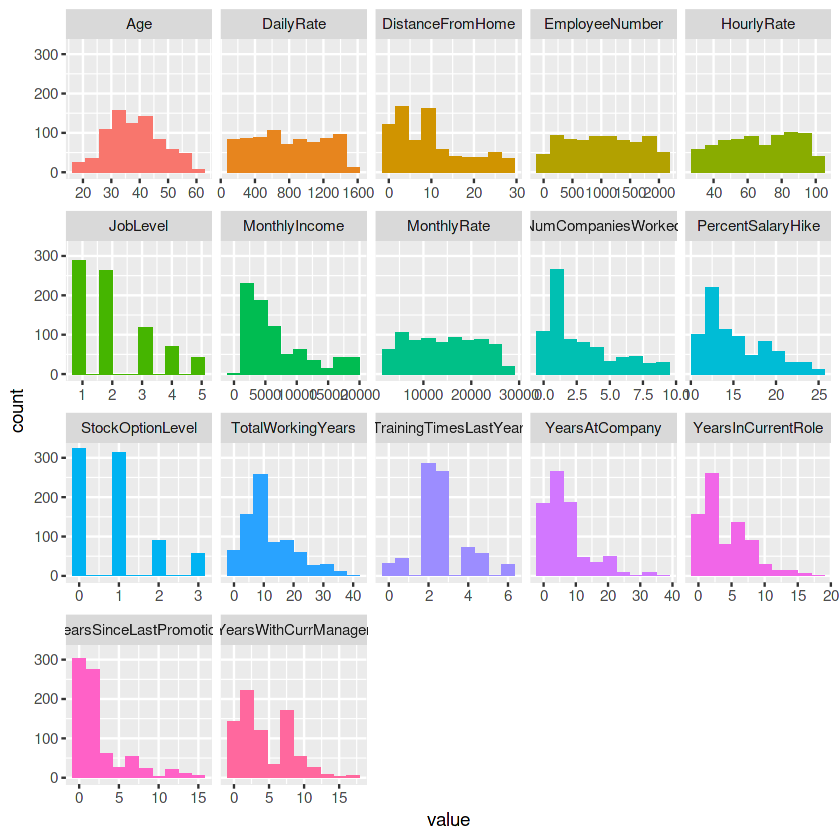

In [11]:
plot_num(df)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


var,frequency,percentage,cumulative_perc
<chr>,<int>,<dbl>,<dbl>
No,655,83.55,83.55
Yes,129,16.45,100.00


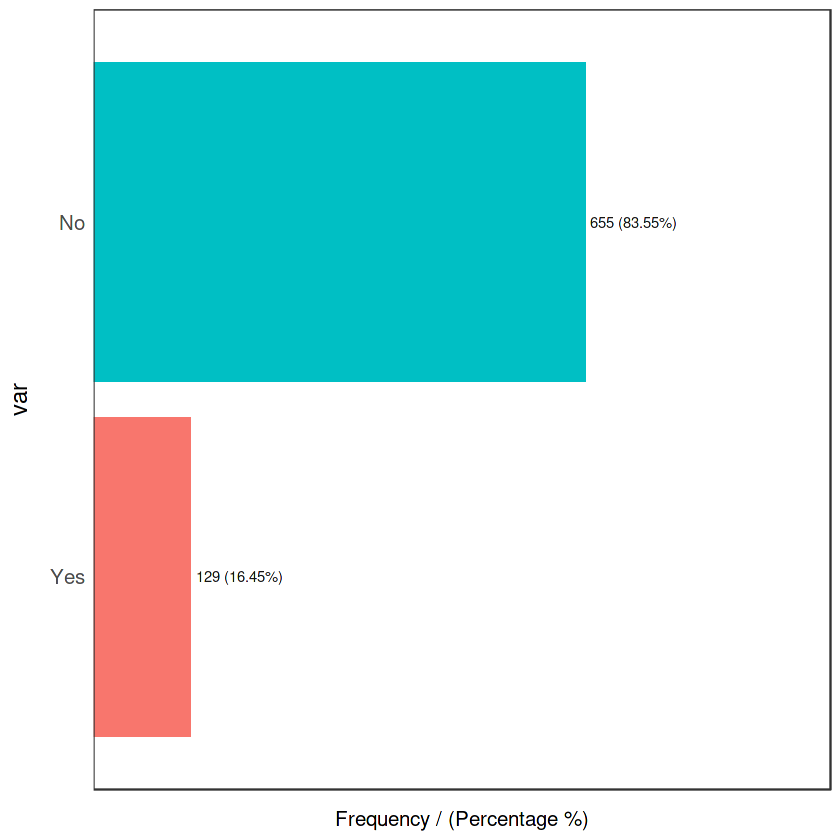

In [12]:
freq(df$Attrition)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


var,frequency,percentage,cumulative_perc
<chr>,<int>,<dbl>,<dbl>
Sales Executive,159,20.28,20.28
Research Scientist,157,20.03,40.31
Laboratory Technician,131,16.71,57.02
Manufacturing Director,78,9.95,66.97
Healthcare Representative,64,8.16,75.13
Manager,63,8.04,83.17
Research Director,57,7.27,90.44
Sales Representative,51,6.51,96.95
Human Resources,24,3.06,100.00


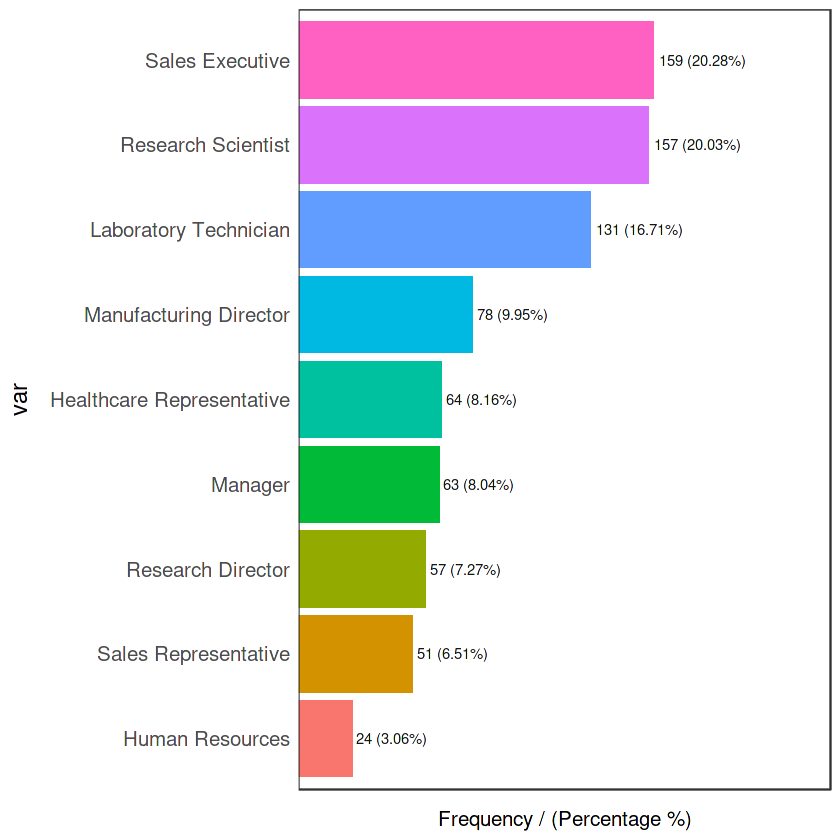

In [13]:
freq(df$JobRole)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


var,frequency,percentage,cumulative_perc
<chr>,<int>,<dbl>,<dbl>
4,246,31.38,31.38
3,228,29.08,60.46
2,164,20.92,81.38
1,146,18.62,100.00


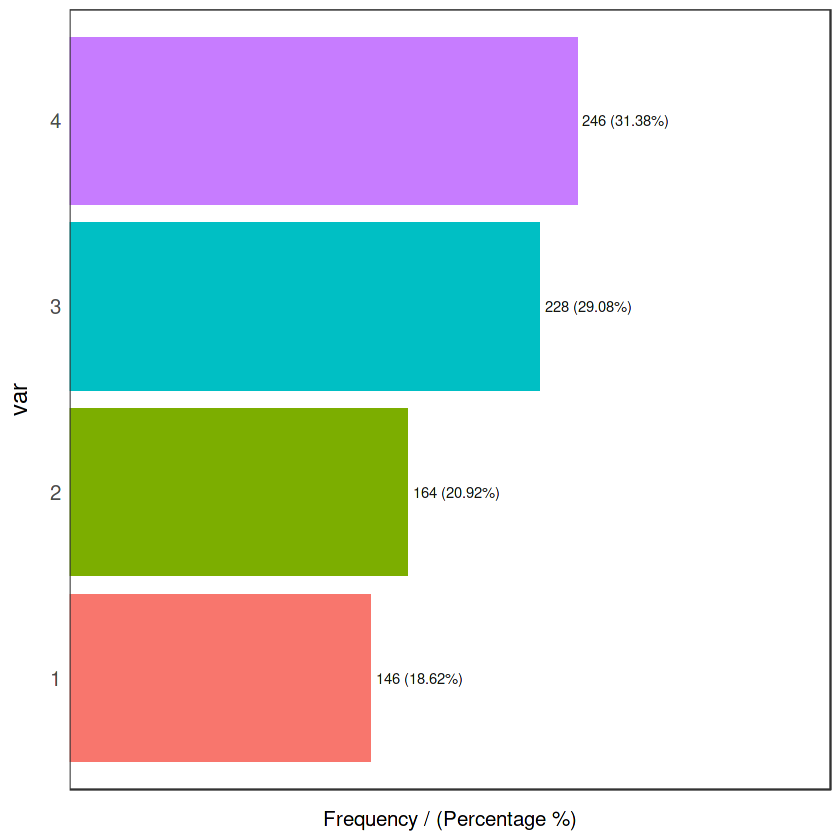

In [14]:
freq(df$JobSatisfaction)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


var,frequency,percentage,cumulative_perc
<chr>,<int>,<dbl>,<dbl>
Male,465,59.31,59.31
Female,319,40.69,100.00


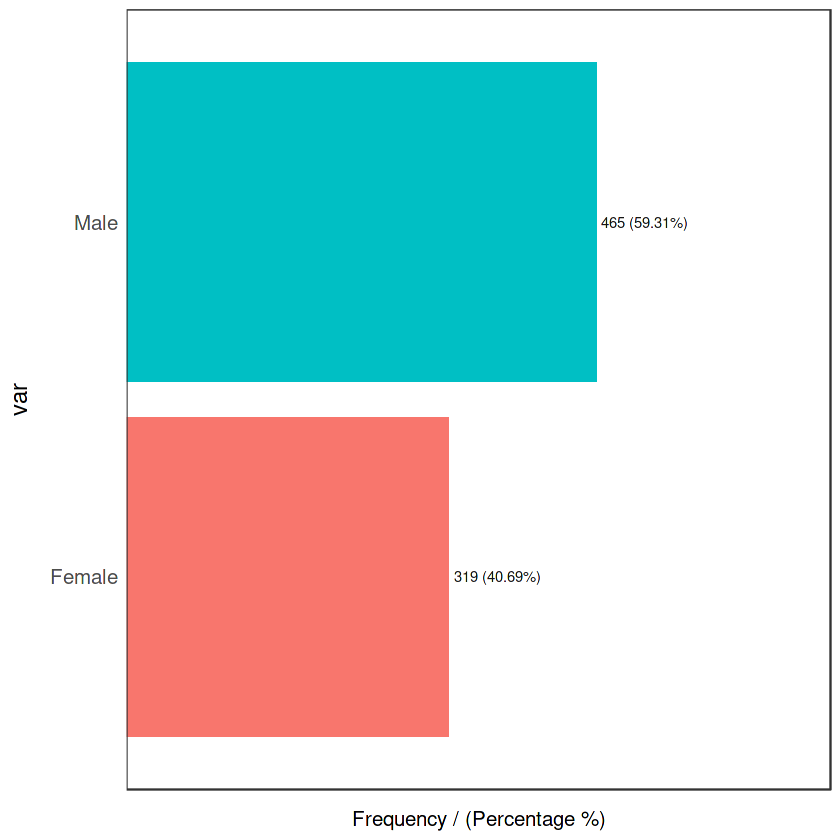

In [15]:
freq(df$Gender)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


var,frequency,percentage,cumulative_perc
<chr>,<int>,<dbl>,<dbl>
Married,363,46.30,46.30
Single,243,30.99,77.29
Divorced,173,22.07,99.36
,5,0.64,100.00


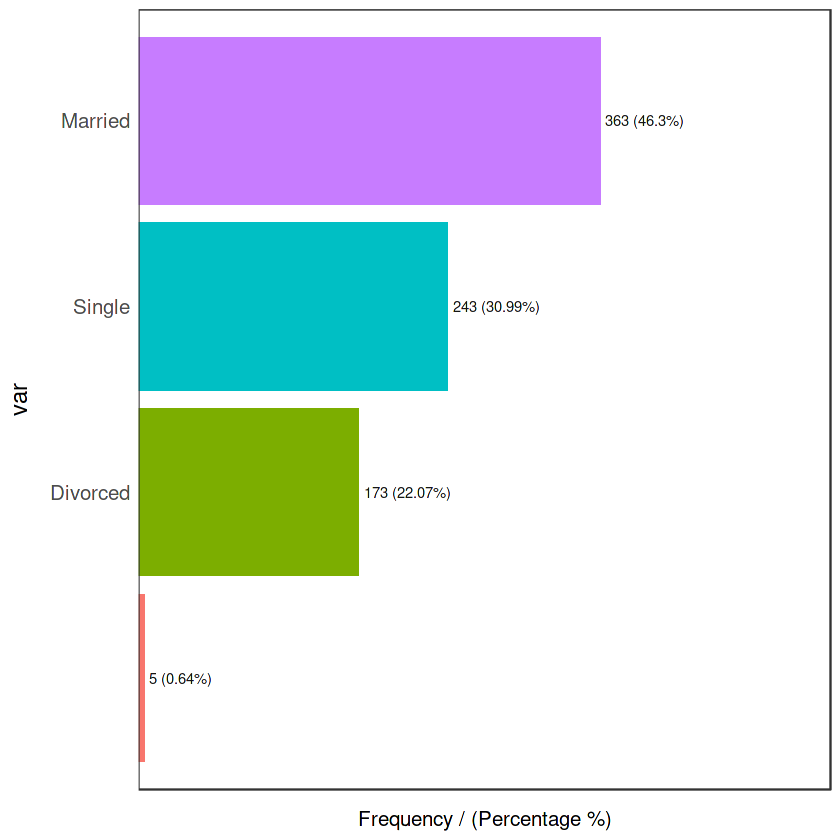

In [16]:
freq(df$MaritalStatus)

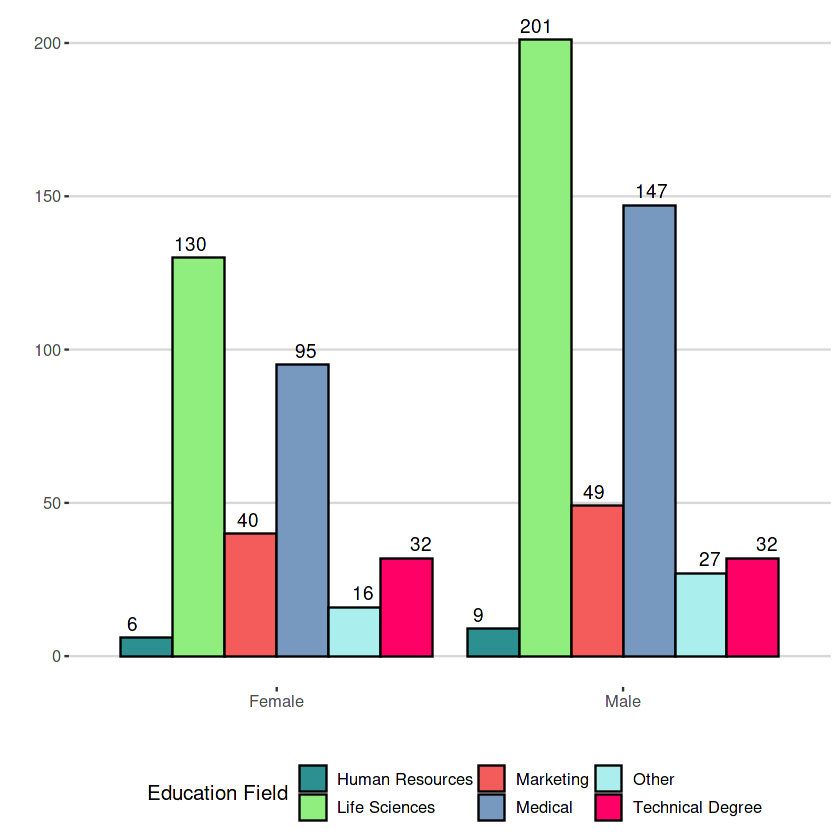

In [17]:
df %>% 
  count(Gender, EducationField) %>% 
  ggplot(aes(x=Gender,y=n,fill=EducationField))+
  geom_bar(stat='identity',position='dodge', col='black')+
  theme_hc()+
  scale_fill_hc('darkunica')+ 
  labs(x='', y='', fill='Education Field')+
  geom_text(aes(label=n),position = position_dodge(width=1), vjust=-.5)

In [18]:
df %>%
  group_by(JobRole) %>%
  get_summary_stats(Age, DailyRate, MonthlyIncome, type = "mean_sd")

JobRole,variable,n,mean,sd
<fct>,<chr>,<dbl>,<dbl>,<dbl>
Healthcare Representative,Age,64,40.375,7.965
Healthcare Representative,DailyRate,64,881.281,402.585
Healthcare Representative,MonthlyIncome,64,7377.891,2456.170
Human Resources,Age,24,36.458,8.330
Human Resources,DailyRate,24,780.458,452.167
Human Resources,MonthlyIncome,24,4079.875,2765.235
Laboratory Technician,Age,131,35.130,8.975
Laboratory Technician,DailyRate,131,758.176,426.914
Laboratory Technician,MonthlyIncome,131,3180.588,1052.374


In [19]:
df %>%
  group_by(JobRole) %>%
  summarise(N = n())

JobRole,N
<fct>,<int>
Healthcare Representative,64
Human Resources,24
Laboratory Technician,131
Manager,63
Manufacturing Director,78
Research Director,57
Research Scientist,157
Sales Executive,159
Sales Representative,51


There is an imbalance in the number of values between groups in the variable. This may cause deviations in the MANOVA basic assumptions. So I will continue by choosing the closest ones and create a new dataset.

In [20]:
df_new <- filter (df, JobRole %in% c("Healthcare Representative", "Manager", "Manufacturing Director", "Resarch Director", "Sales Representative"))

In [21]:
levels(df_new$Education)<-c("Below College","College","Bachelor", "Master", "Doctor")
levels(df_new$EnvironmentSatisfaction)<-c("Low","Medium", "High", "Very High")
levels(df_new$JobInvolvement)<- c("Low","Medium", "High", "Very High")
levels(df_new$JobSatisfaction)<-c("Low","Medium", "High", "Very High")
levels(df_new$PerformanceRating)<-c("Low","Good", "Excellent", "Outstanding")
levels(df_new$RelationshipSatisfaction)<-c("Low","Medium", "High", "Very High")
levels(df_new$WorkLifeBalance)<-c("Bad","Good", "Better", "Best")

df_new$Attrition<- as.factor(df_new$Attrition)
df_new$BusinessTravel<- as.factor(df_new$BusinessTravel)
df_new$Department<-as.factor(df_new$Department)
df_new$EducationField<-as.factor(df_new$EducationField)
df_new$Gender<-as.factor(df_new$Gender)
df_new$JobRole<-as.factor(df_new$JobRole)
df_new$MaritalStatus<-as.factor(df_new$MaritalStatus)
df_new$OverTime<-as.factor(df_new$OverTime)
df_new$Education<-as.factor(df_new$Education)
df_new$EnvironmentSatisfaction<- as.factor(df_new$EnvironmentSatisfaction)
df_new$JobInvolvement<- as.factor(df_new$JobInvolvement)
df_new$JobSatisfaction<- as.factor(df_new$JobSatisfaction)
df_new$RelationshipSatisfaction<- as.factor(df_new$RelationshipSatisfaction)
df_new$PerformanceRating<- as.factor(df_new$PerformanceRating)
df_new$WorkLifeBalance<- as.factor(df_new$WorkLifeBalance)

str(df_new)

'data.frame':	256 obs. of  32 variables:
 $ Age                     : int  36 21 52 33 47 22 55 46 40 53 ...
 $ Attrition               : Factor w/ 2 levels "No","Yes": 1 2 1 2 1 1 1 1 1 1 ...
 $ BusinessTravel          : Factor w/ 4 levels "","Non-Travel",..: 4 4 4 4 4 4 3 4 4 4 ...
 $ DailyRate               : int  216 337 994 1277 1001 1230 1091 168 611 1376 ...
 $ Department              : Factor w/ 3 levels "Human Resources",..: 2 3 2 2 2 2 2 3 3 3 ...
 $ DistanceFromHome        : int  6 7 7 15 4 1 2 4 7 2 ...
 $ Education               : Factor w/ 5 levels "Below College",..: 2 1 4 1 3 2 1 2 4 2 ...
 $ EducationField          : Factor w/ 6 levels "Human Resources",..: 4 3 2 4 2 2 2 3 4 4 ...
 $ EmployeeNumber          : int  178 1780 1118 582 1827 872 1096 1280 1740 981 ...
 $ EnvironmentSatisfaction : Factor w/ 4 levels "Low","Medium",..: 2 2 2 2 3 4 4 4 2 3 ...
 $ Gender                  : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 2 2 1 2 2 ...
 $ HourlyRate              : 

In [22]:
df_new %>%
  group_by(JobRole) %>%
  summarise(N = n())

JobRole,N
<fct>,<int>
Healthcare Representative,64
Manager,63
Manufacturing Director,78
Sales Representative,51


In [23]:
df_new %>%
  group_by(JobSatisfaction) %>%
  summarise(N = n())

JobSatisfaction,N
<fct>,<int>
Low,43
Medium,51
High,79
Very High,83


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


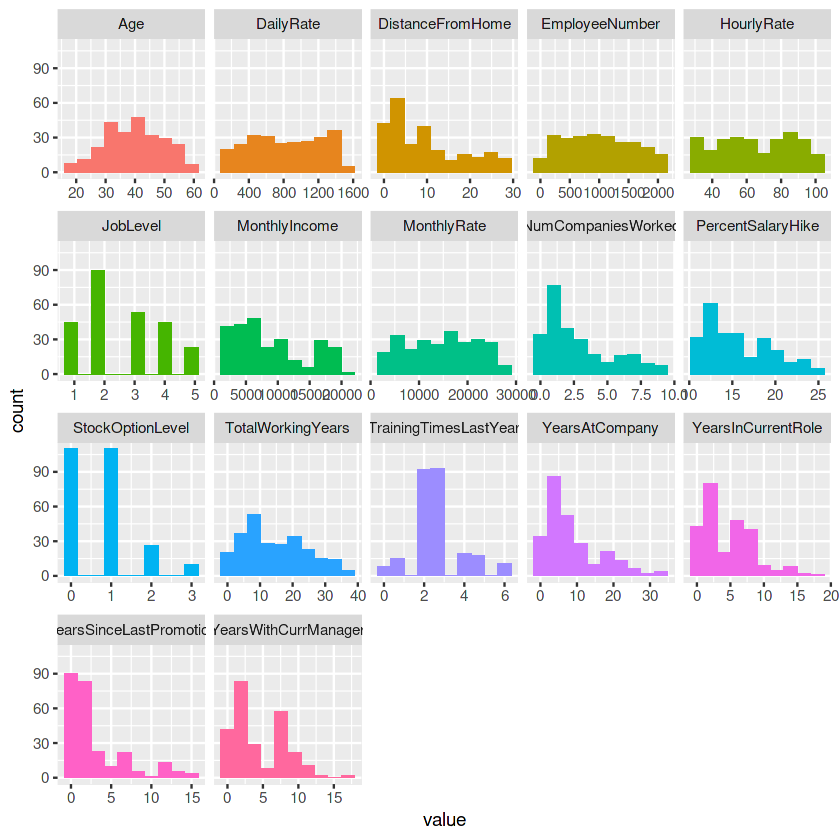

In [24]:
plot_num(df_new)

In [25]:
df_new%>%
  group_by(JobRole) %>%
  get_summary_stats(Age, DailyRate, MonthlyIncome, type = "mean_sd")

JobRole,variable,n,mean,sd
<fct>,<chr>,<dbl>,<dbl>,<dbl>
Healthcare Representative,Age,64,40.375,7.965
Healthcare Representative,DailyRate,64,881.281,402.585
Healthcare Representative,MonthlyIncome,64,7377.891,2456.170
Manager,Age,63,47.222,6.627
Manager,DailyRate,63,801.365,453.417
Manager,MonthlyIncome,63,17343.889,2033.344
Manufacturing Director,Age,78,39.077,8.940
Manufacturing Director,DailyRate,78,808.705,379.739
Manufacturing Director,MonthlyIncome,78,7459.397,2827.267


In [26]:
df_new %>%
  group_by(JobSatisfaction) %>%
  get_summary_stats(Age, DailyRate, MonthlyIncome, type = "mean_sd")

JobSatisfaction,variable,n,mean,sd
<fct>,<chr>,<dbl>,<dbl>,<dbl>
Low,Age,43,38.140,9.896
Low,DailyRate,43,878.000,373.504
Low,MonthlyIncome,43,9070.953,5895.768
Medium,Age,51,39.275,9.968
Medium,DailyRate,51,740.549,432.641
Medium,MonthlyIncome,51,8895.412,6167.028
High,Age,79,39.646,9.717
High,DailyRate,79,857.025,401.042
High,MonthlyIncome,79,8564.329,5474.531


In [27]:
summary(df_new$Age, df_new$DailyRate, df_new$MonthlyIncome)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   31.75   39.00   39.70   47.00   59.00 

# MANOVA

## One Way MANOVA

Assumptions for MANOVA:

**1.** Multivariate normality

**2.** Equality of intergroup variance covariance matrix

Examining the multivariate normality assumption:

**Hypothesis:**

$H_0$: The distribution of the data conforms to the multivariate normal distribution.

$H_1$: The distribution of the data does not fit the multivariate normal distribution.

Since the p value is > 0.05, $H_0$ is accepted. The data fit a multivariate normal distribution.


In [28]:
df_new %>%
  dplyr::select(Age, DailyRate, MonthlyIncome) %>%
  mshapiro_test()

statistic,p.value
<dbl>,<dbl>
0.9892001,0.05319948


Examining the assumption of homogeneity of variance covariance matrices (*box_m*).

**Hypothesis:**

$H_0$ : The variance covariance matrices between the groups are equal.

$H_1$ : The variance covariance matrices between the groups are not equal.

Since the p value is >0.05, the $H_0$ hypothesis is accepted. We can say that the variance covariance matrices between the groups are equal. In this case, we have provided two basic assumptions.

In [29]:
#Homogeneity of Covariances
box_m(df_new[, c("Age","DailyRate","MonthlyIncome")], df_new$JobSatisfaction)

statistic,p.value,parameter,method
<dbl>,<dbl>,<dbl>,<chr>
13.07827,0.7869027,18,Box's M-test for Homogeneity of Covariance Matrices


By looking at the Levene test, it is examined whether the variances between the groups are equal. 

For the age variable:

**Hypothesis:**

$H_0$ : The variance between groups is equal.

$H_1$ : The variance between the groups is not equal.

Since the p value is >0.05, the $H_0$ hypothesis is accepted. The variance between groups is equal. We will look at the Tukey test in pairwise multiple comparisons.

In [30]:
#Homogeneity of variance- Levene's Test
leveneTest(Age ~ JobSatisfaction, data=df_new ,center=mean)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,0.03825767,0.9899818
,252,NA,NA


For the Daily rate variable:

**Hypothesis:**

$H_0$ : The variance between groups is equal.

$H_1$ : The variance between the groups is not equal.

Since the p value is >0.05, the $H_0$ hypothesis is accepted. The variance between groups is equal. We will look at the Tukey test in pairwise multiple comparisons.


In [31]:
leveneTest(DailyRate ~ JobSatisfaction, data=df_new, center=mean)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,0.8534636,0.4658755
,252,NA,NA


For the monthly income variable:

**Hypothesis:**

$H_0$ : The variance between groups is equal.

$H_1$ : The variance between the groups is not equal.

Since the p value is >0.05, the $H_0$ hypothesis is accepted. The variance between groups is equal. We will look at the Tukey test in pairwise multiple comparisons.


In [32]:
leveneTest(MonthlyIncome ~ JobSatisfaction, data=df_new, center=mean)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,1.259655,0.2887702
,252,NA,NA


In [33]:
#Mevki duzeyleri bazında degisken ortalamaları
means_job <- aggregate(df_new[,1] ,list(df_new$JobSatisfaction), mean)
means_job

Group.1,x
<fct>,<dbl>
Low,38.13953
Medium,39.27451
High,39.64557
Very High,40.80723


In [34]:
means_job1 <- aggregate(df_new[,4] ,list(df_new$JobSatisfaction), mean)
means_job1

Group.1,x
<fct>,<dbl>
Low,878.0000
Medium,740.5490
High,857.0253
Very High,827.6627


In [35]:
means_job2 <- aggregate(df_new[,18] ,list(df_new$JobSatisfaction), mean)
means_job2

Group.1,x
<fct>,<dbl>
Low,9070.953
Medium,8895.412
High,8564.329
Very High,9222.289


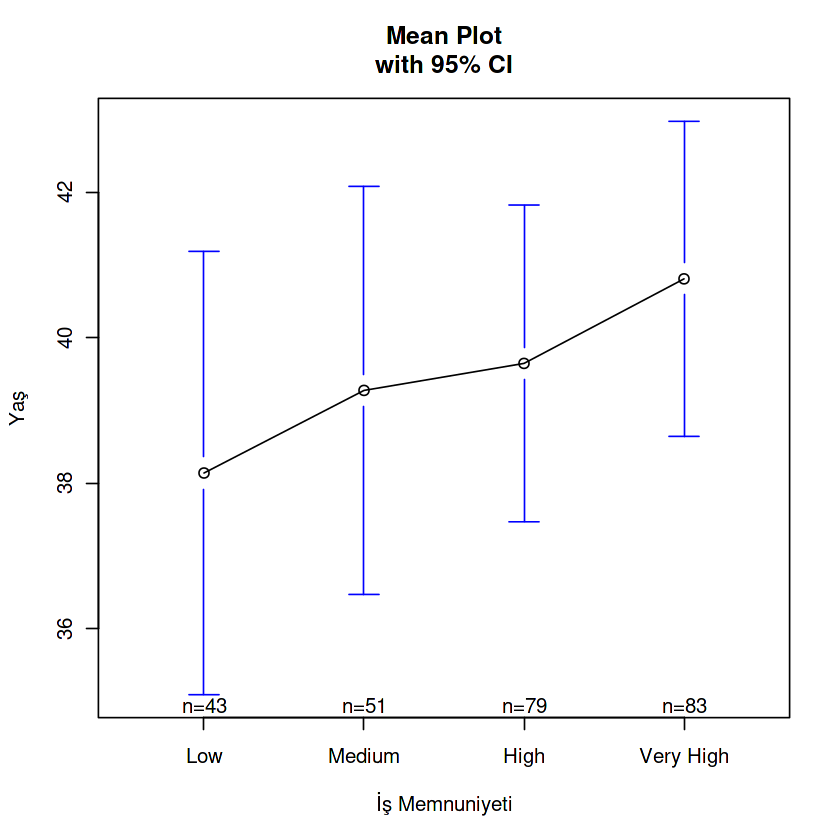

In [36]:
#jobsatisfaction için 
plotmeans(df_new$Age~ df_new$JobSatisfaction, xlab="İş Memnuniyeti",ylab="Yaş", main="Mean Plot\nwith 95% CI")

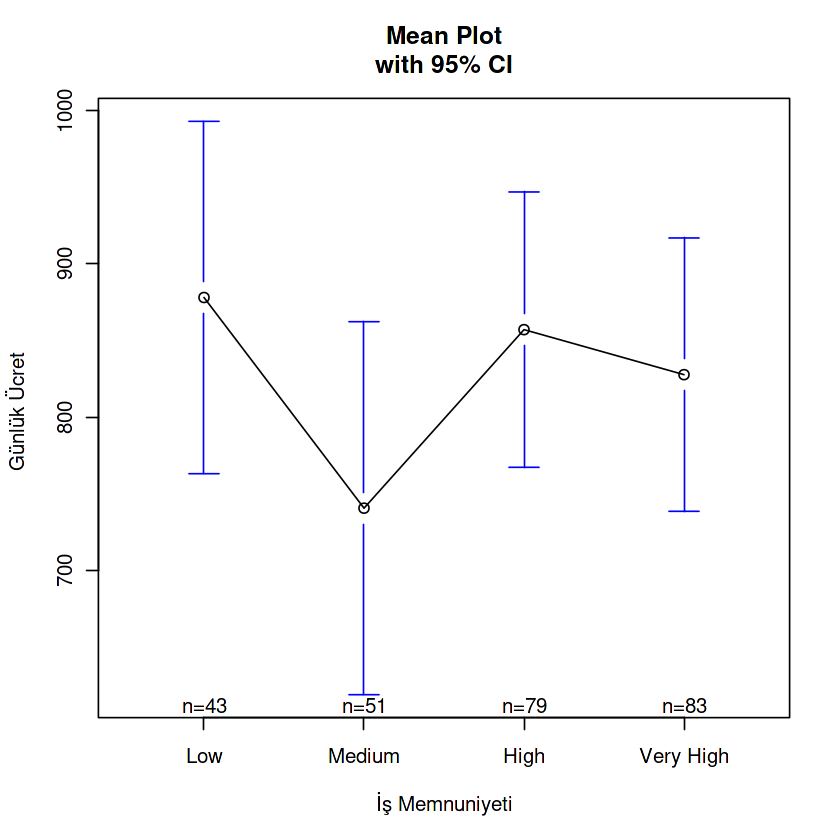

In [37]:
plotmeans(df_new$DailyRate~ df_new$JobSatisfaction,xlab="İş Memnuniyeti",ylab="Günlük Ücret ", main="Mean Plot\nwith 95% CI")

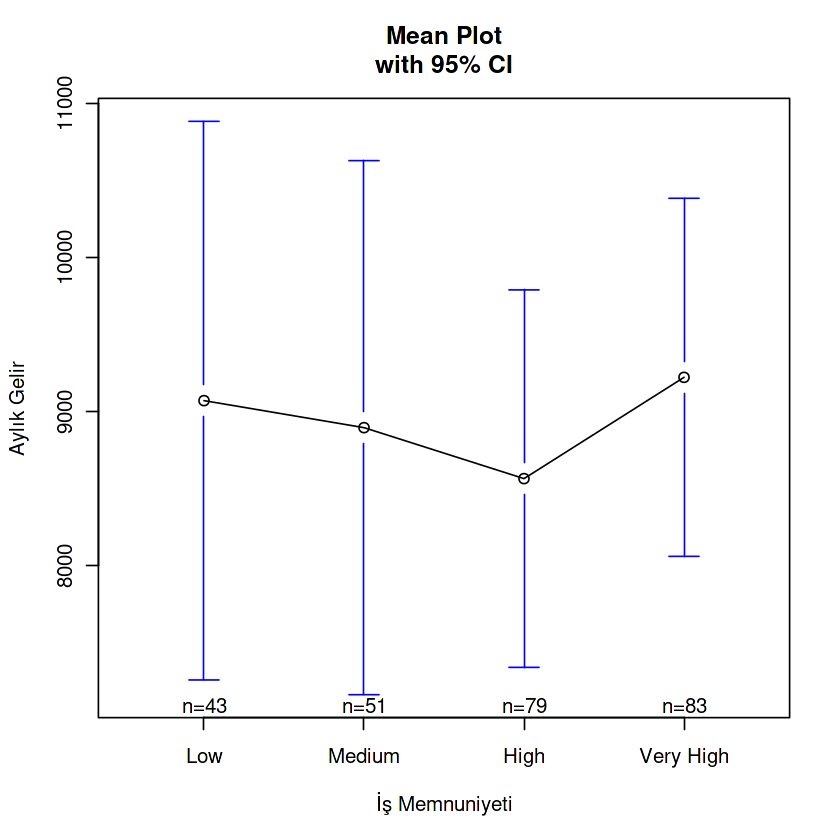

In [38]:
plotmeans(df_new$MonthlyIncome~ df_new$JobSatisfaction,xlab="İş Memnuniyeti",ylab="Aylık Gelir", main="Mean Plot\nwith 95% CI")

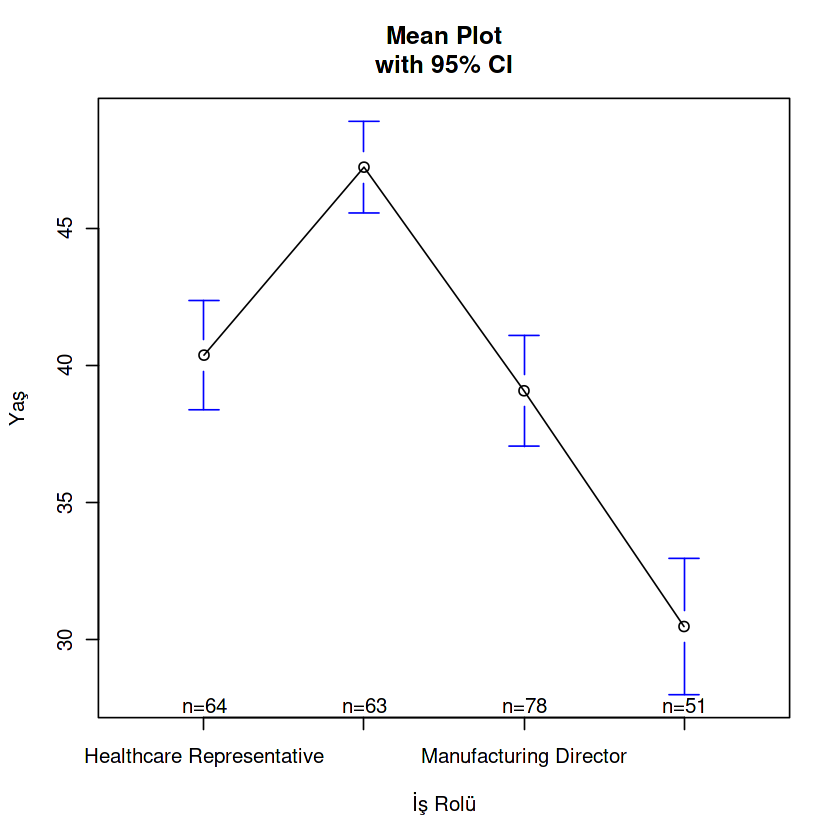

In [39]:
plotmeans(df_new$Age~ df_new$JobRole, xlab="İş Rolü",ylab="Yaş", main="Mean Plot\nwith 95% CI")

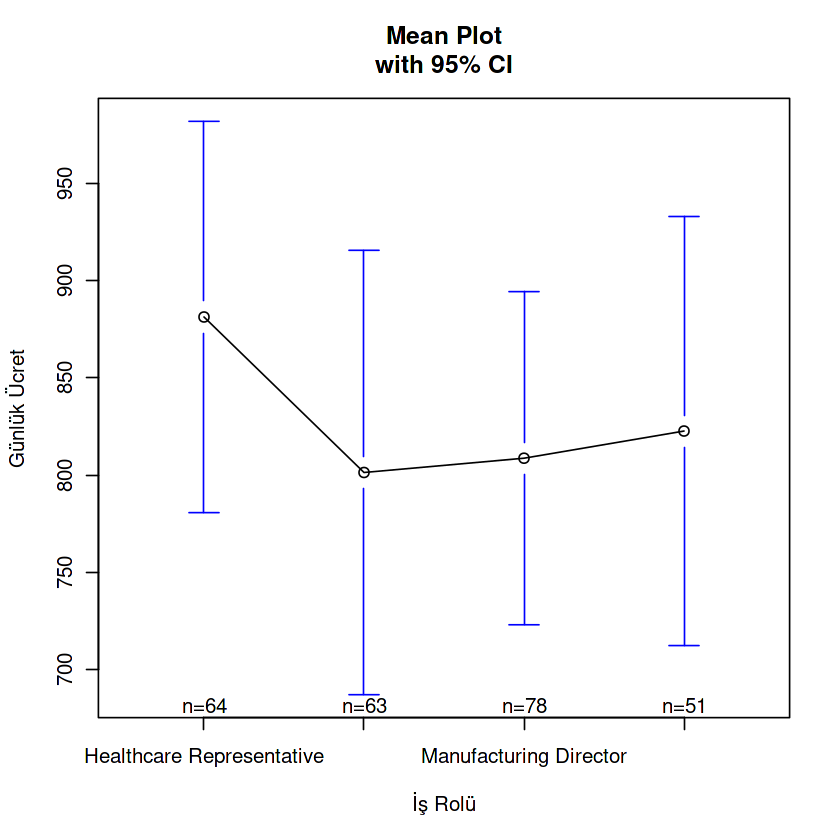

In [40]:
plotmeans(df_new$DailyRate~ df_new$JobRole, xlab="İş Rolü",ylab="Günlük Ücret", main="Mean Plot\nwith 95% CI")

Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(x, ui, x, pmin(y + gap, ui), col = barcol, lwd = lwd, :
“zero-length arrow is of indeterminate angle and so skipped”


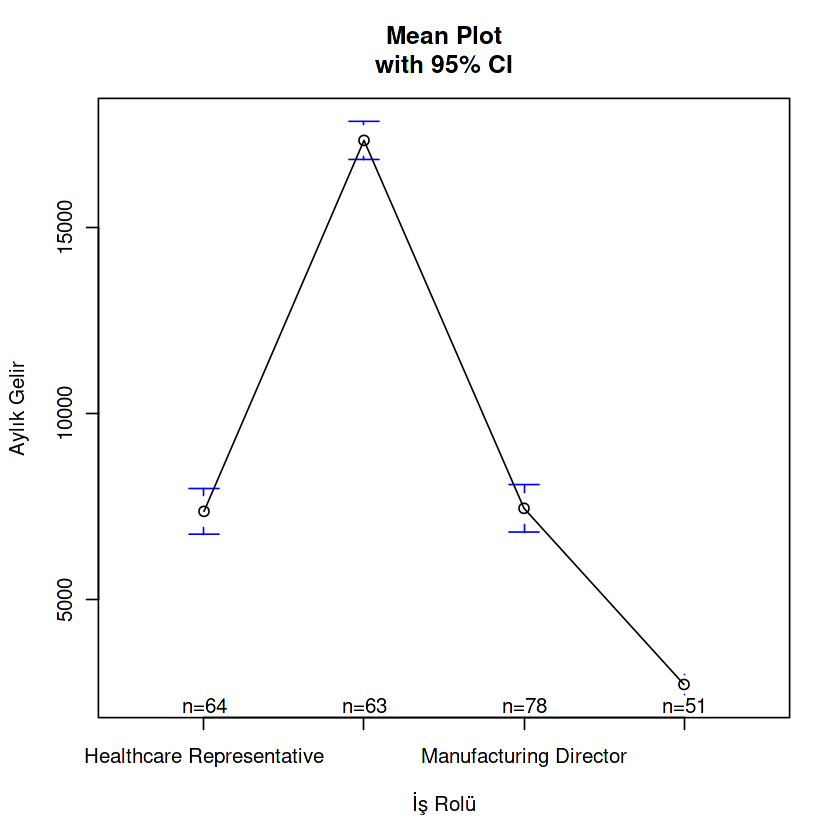

In [41]:
plotmeans(df_new$MonthlyIncome~ df_new$JobRole, xlab="İş Rolü",ylab="Aylık Gelir", main="Mean Plot\nwith 95% CI")

In [42]:
#Manova
job_manova <- manova(cbind(Age,DailyRate, MonthlyIncome) ~ JobSatisfaction ,data=df_new)
summary(job_manova, test = "Wilks")

                 Df   Wilks approx F num Df den Df Pr(>F)
JobSatisfaction   3 0.97117  0.81759      9 608.58 0.6001
Residuals       252                                      

**Hypothesis:**

$H_0$: There is no significant difference between the groups in terms of the dependent variable.

$H_1$: There is a significant difference between the groups in terms of the dependent variable.

Since the p values of all variables are >0.008, the $H_0$ hypothesis is accepted. We have already found that there is no significant difference between the groups in terms of dependent variables.

In [43]:
### Test of Between Subjects####Farkliligi yaratan degisken hangisi ?
summary.aov(job_manova)

 Response Age :
                 Df  Sum Sq Mean Sq F value Pr(>F)
JobSatisfaction   3   215.9  71.974  0.7402 0.5289
Residuals       252 24502.3  97.231               

 Response DailyRate :
                 Df   Sum Sq Mean Sq F value Pr(>F)
JobSatisfaction   3   564088  188029  1.1435 0.3321
Residuals       252 41438847  164440               

 Response MonthlyIncome :
                 Df     Sum Sq  Mean Sq F value Pr(>F)
JobSatisfaction   3   18569340  6189780  0.1943 0.9002
Residuals       252 8025961133 31849052               


**Multiple Comparisons**

For the age variable:

**Hypothesis:**

$H_0$ : There is no significant difference between the variables.

$H_1$ : There is a significant difference between the variables.

Since the p value is >0.05, the $H_0$ hypothesis is accepted. He can say that there is no statistically significant difference.

In [44]:
tatmin_aov <- aov(Age ~ JobSatisfaction, data =df_new)
TukeyHSD(tatmin_aov, "JobSatisfaction")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Age ~ JobSatisfaction, data = df_new)

$JobSatisfaction
                      diff       lwr      upr     p adj
Medium-Low       1.1349749 -4.144847 6.414797 0.9448632
High-Low         1.5060347 -3.326854 6.338923 0.8516117
Very High-Low    2.6676940 -2.123973 7.459361 0.4757120
High-Medium      0.3710598 -4.209807 4.951927 0.9967425
Very High-Medium 1.5327191 -3.004638 6.070076 0.8185010
Very High-High   1.1616593 -2.846819 5.170138 0.8768208


For the daily rate variable:

**Hypothesis:**

$H_0$ : There is no significant difference between the variables.

$H_1$ : There is a significant difference between the variables.

Since the p value is >0.05, the $H_0$ hypothesis is accepted. He can say that there is no statistically significant difference.

In [45]:
tatmin_aov <- aov(DailyRate ~ JobSatisfaction, data =df_new)
TukeyHSD(tatmin_aov, "JobSatisfaction")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = DailyRate ~ JobSatisfaction, data = df_new)

$JobSatisfaction
                       diff        lwr       upr     p adj
Medium-Low       -137.45098 -354.58085  79.67889 0.3596458
High-Low          -20.97468 -219.72467 177.77530 0.9928791
Very High-Low     -50.33735 -247.39212 146.71742 0.9117077
High-Medium       116.47630  -71.90943 304.86203 0.3810088
Very High-Medium   87.11363  -99.48275 273.71002 0.6227155
Very High-High    -29.36267 -194.20922 135.48389 0.9674839


For the monthly income variable:

**Hypothesis:**

$H_0$ : There is no significant difference between the variables.

$H_1$ : There is a significant difference between the variables.

Since the p value is >0.05, the $H_0$ hypothesis is accepted. He can say that there is no statistically significant difference.

In [46]:
tatmin_aov <- aov(MonthlyIncome ~ JobSatisfaction, data =df_new)
TukeyHSD(tatmin_aov, "JobSatisfaction")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = MonthlyIncome ~ JobSatisfaction, data = df_new)

$JobSatisfaction
                      diff       lwr      upr     p adj
Medium-Low       -175.5417 -3197.332 2846.248 0.9987887
High-Low         -506.6244 -3272.622 2259.373 0.9648047
Very High-Low     151.3357 -2591.070 2893.741 0.9989608
High-Medium      -331.0827 -2952.841 2290.676 0.9879457
Very High-Medium  326.8774 -2269.979 2923.734 0.9880592
Very High-High    657.9600 -1636.205 2952.125 0.8801099


**Thank you for reading!!**